In [41]:
import pandas as pd
import numpy as np

from config import group_by, prices, city_group_by
from helper_func import create_df

Data Extraction

In [42]:
df = pd.read_csv("data/olx_spiders/olx_spiders_2023_02_10T09-00-00.csv")

In [43]:
df.shape

(31945, 18)

In [44]:
df.head()

,Посилання,Заголовок,Ціна,Область,Місто,Id,Власник,Дата,Район,Поверх,Поверховість,Загальна площа,Площа кухні,Тип стін,Кількість кімнат,Планування,Опалення,Ремонт
0,https://www.olx.ua/d/uk/obyavlenie/sdam-2-h-ko...,"Сдам 2-х комн квартиру Центр, Набережная, Попл...",9000,Дніпропетровська область,Дніпро,781176003,Бізнес,2023-02-13,Центральний,9,14,54 м²,10 м²,Цегляний,2 кімнати,Роздільна,Централізоване,Косметичний ремонт
1,https://www.olx.ua/d/uk/obyavlenie/sdam-2k-kva...,"Сдам 2к квартиру на Дзержинского, Центр, парк ...",8000,Дніпропетровська область,Дніпро,781330906,Бізнес,2023-02-12,Центральний,10,18,55 м²,6 м²,NaN,2 кімнати,Роздільна,Власна котельня,Косметичний ремонт
2,https://www.olx.ua/d/uk/obyavlenie/sdam-3k-kva...,Сдам 3к квартиру на Тополе 2,11500,Дніпропетровська область,Дніпро,781787150,Бізнес,2023-02-13,Шевченківський,7,9,68 м²,9 м²,NaN,3 кімнати,NaN,NaN,NaN
3,https://www.olx.ua/d/uk/obyavlenie/berem-vseh-...,Берём всех! 2к Северный 15 мин до Калиновой пр...,4999,Дніпропетровська область,Дніпро,782360347,Бізнес,2023-02-07,Самарський,1,5,48 м²,8 м²,NaN,2 кімнати,NaN,NaN,NaN
4,https://www.olx.ua/d/uk/obyavlenie/sdam-2k-kva...,Сдам 2к квартиру на ж/м Красный Камень,7000,Дніпропетровська область,Дніпро,782184951,Бізнес,2023-02-12,Новокодацький,8,9,48 м²,8 м²,NaN,2 кімнати,Роздільна,Централізоване,Косметичний ремонт


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31945 entries, 0 to 31944
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Посилання         31945 non-null  object
 1   Заголовок         31945 non-null  object
 2   Ціна              31945 non-null  object
 3   Область           31945 non-null  object
 4   Місто             31945 non-null  object
 5   Id                31945 non-null  object
 6   Власник           31945 non-null  object
 7   Дата              31945 non-null  object
 8   Район             17335 non-null  object
 9   Поверх            31945 non-null  object
 10  Поверховість      31945 non-null  object
 11  Загальна площа    31945 non-null  object
 12  Площа кухні       31945 non-null  object
 13  Тип стін          19528 non-null  object
 14  Кількість кімнат  31945 non-null  object
 15  Планування        19327 non-null  object
 16  Опалення          24200 non-null  object
 17  Ремонт      

In [46]:
df.describe()

,Посилання,Заголовок,Ціна,Область,Місто,Id,Власник,Дата,Район,Поверх,Поверховість,Загальна площа,Площа кухні,Тип стін,Кількість кімнат,Планування,Опалення,Ремонт
count,31945,31945,31945,31945,31945,31945,31945,31945,17335,31945,31945,31945,31945,19528,31945,19327,24200,23140
unique,19852,18720,418,25,25,19728,3,36,72,39,45,335,154,9,6,10,9,8
top,https://www.olx.ua/d/uk/obyavlenie/sdam-2-h-ko...,Оренда 1 кімнатної квартири,10000,Харківська область,Харків,772585260,Бізнес,2023-02-12,Ленінський,2,9,45 м²,8 м²,Цегляний,1 кімната,Роздільна,Централізоване,Євроремонт
freq,2,75,2172,2122,2122,4,27571,5531,1350,4934,9674,2422,4246,14415,14518,14280,12387,11263


Data cleaning

In [47]:
df = df.drop_duplicates()
df = df[df["Id"] != "Id"]
df = df.drop(columns=["Заголовок", "Посилання", "Планування", "Id", "Область"])

In [48]:
df["Поверх"] = df["Поверх"].str.replace(" ", "")
df["Поверховість"] = df["Поверховість"].str.replace(" ", "")

df["Поверх"] = df["Поверх"].astype(str).astype(float).astype(int)
df["Поверховість"] = df["Поверховість"].astype(str).astype(float).astype(int)

df = df[df["Поверх"] <= df["Поверховість"]]
df = df[df["Поверховість"] < 49]


In [49]:
# convert object into int
df["Загальна площа"] = df["Загальна площа"].str.replace(" м²", "")
df["Площа кухні"] = df["Площа кухні"].str.replace(" м²", "")

df["Загальна площа"] = df["Загальна площа"].str.replace(" ", "")
df["Площа кухні"] = df["Площа кухні"].str.replace(" ", "")

df["Загальна площа"] = df["Загальна площа"].astype(str).astype(float).astype(int)
df["Площа кухні"] = df["Площа кухні"].astype(str).astype(float).astype(int)
df["Ціна"] = df["Ціна"].astype(str).astype(float).astype(int)

df = df[df["Загальна площа"] > df["Площа кухні"]]
df = df[(df["Загальна площа"] > 6) & (df["Загальна площа"] < 500)]
df = df[df["Площа кухні"] < 50]
df = df[(df["Ціна"] >= 1000) & (df["Ціна"] <= 60000)]

df["Ціна м2"] = (df["Ціна"] / df["Загальна площа"]).astype(int)
df = df[(df["Ціна м2"] > 50) & (df["Ціна м2"] < 1000)]


In [50]:
df["Кількість кімнат"] = df["Кількість кімнат"].str.replace("+", "", regex=False)
df["Кількість кімнат"] = df["Кількість кімнат"].str.split(" ", expand=True)[0]
df["Кількість кімнат"] = df["Кількість кімнат"].astype(str).astype(int)

Data wrangling

In [51]:
df["Дата"] = pd.to_datetime(df["Дата"])

In [52]:
df["Поверх"] = df["Поверх"].apply(np.int8)
df["Поверховість"] = df["Поверховість"].apply(np.int8)
df["Кількість кімнат"] = df["Кількість кімнат"].apply(np.int8)
df["Площа кухні"] = df["Площа кухні"].apply(np.int8)
df["Загальна площа"] = df["Загальна площа"].apply(np.int64)


In [53]:
df_offerer = df["Власник"].to_list()
df_offerer_types = pd.DataFrame.from_dict(df_offerer).drop_duplicates()
df_offerer_columns = df_offerer_types[0].to_list()
offerer_flat = df["Власник"].explode()
df = df.join(pd.crosstab(offerer_flat.index, offerer_flat))

In [54]:
df = df[(df["Ремонт"] != "Під чистову обробку")]
df = df[(df["Ремонт"] != "Аварійний стан")]
df = df[(df["Ремонт"] != "Після будівельників")]
df["Ремонт"] = df["Ремонт"].fillna("Інше")
df["Ремонт"] = df["Ремонт"].str.replace("Інше", "Ін.ремонт")
df_repair = df["Ремонт"].to_list()
df_repair_types = pd.DataFrame.from_dict(df_repair).drop_duplicates()
df_repair_columns = df_repair_types[0].to_list()
repair_flat = df["Ремонт"].explode()
df = df.join(pd.crosstab(repair_flat.index, repair_flat))


In [55]:
df["Опалення"] = df["Опалення"].fillna("Інше")
df["Опалення"] = df["Опалення"].str.replace("Тепловий насос", "Інше")
df["Опалення"] = df["Опалення"].str.replace("Твердопаливне", "Інше")
df["Опалення"] = df["Опалення"].str.replace("Власна котельня", "Інше")
df["Опалення"] = df["Опалення"].str.replace("Інше", "Ін.опалення")
heat_types = df["Опалення"].to_list()
df_heat_types = pd.DataFrame.from_dict(heat_types).drop_duplicates()
df_heat_columns = df_heat_types[0].to_list()
heat_flat = df["Опалення"].explode()
df = df.join(pd.crosstab(heat_flat.index, heat_flat))


In [56]:
df["Тип стін"] = df["Тип стін"].fillna("Інше")
df["Тип стін"] = df["Тип стін"].str.replace("СІП панель", "Інше")
df["Тип стін"] = df["Тип стін"].str.replace("Шлакоблочний", "Інше")
df["Тип стін"] = df["Тип стін"].str.replace("Газоблок", "Інше")
df["Тип стін"] = df["Тип стін"].str.replace("Інше", "Ін.стіни")

walls_types = df["Тип стін"].to_list()
df_walls_types = pd.DataFrame.from_dict(walls_types).drop_duplicates()
df_walls_columns = df_walls_types[0].to_list()
walls_flat = df["Тип стін"].explode()
df = df.join(pd.crosstab(walls_flat.index, walls_flat))

In [57]:
df["Район"] = df["Район"].fillna("Невідомо")

In [58]:
one_room = df[df["Кількість кімнат"] == 1]
two_rooms = df[df["Кількість кімнат"] == 2]
three_rooms = df[df["Кількість кімнат"] == 3]
rooms = [one_room, two_rooms, three_rooms]

Analysis

<AxesSubplot: title={'center': 'Частка оголошень по містам'}>

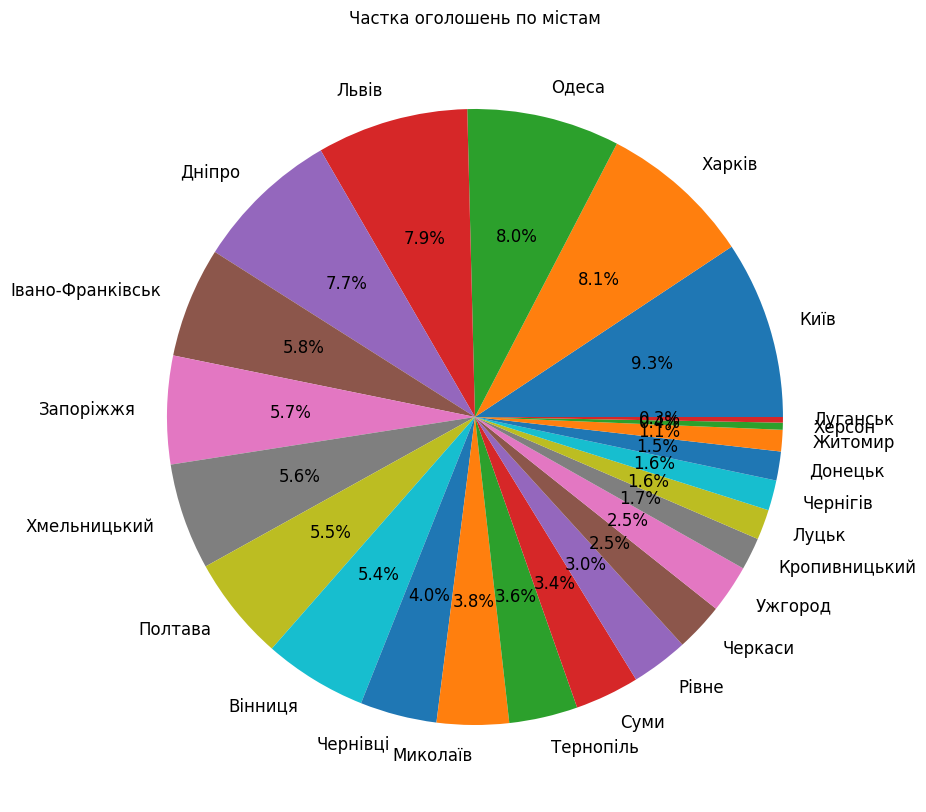

In [59]:
cities = df["Місто"].value_counts()
cities.plot(kind="pie", autopct="%1.1f%%", title="Частка оголошень по містам", ylabel="", figsize=(10,10), textprops={"fontsize": 12})

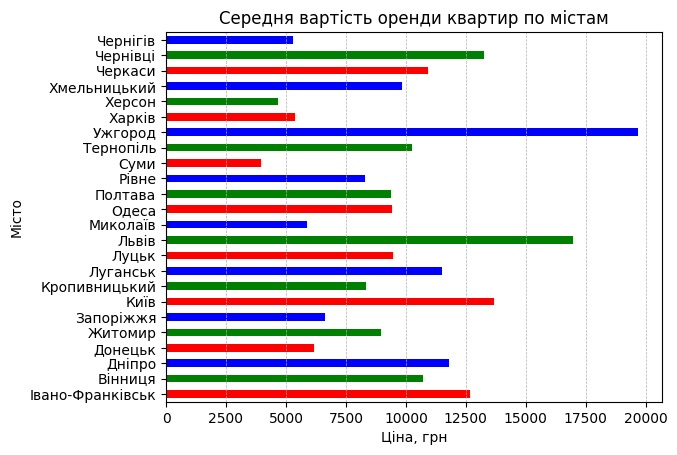

In [60]:
avarage_price_in_cities = df.groupby("Місто")["Ціна"].mean()
ax = avarage_price_in_cities.plot(kind="barh", title="Середня вартість оренди квартир по містам", color=["r", "g", "b"], xlabel="Ціна, грн")
ax.xaxis.grid(True, linestyle="--", linewidth=0.5)

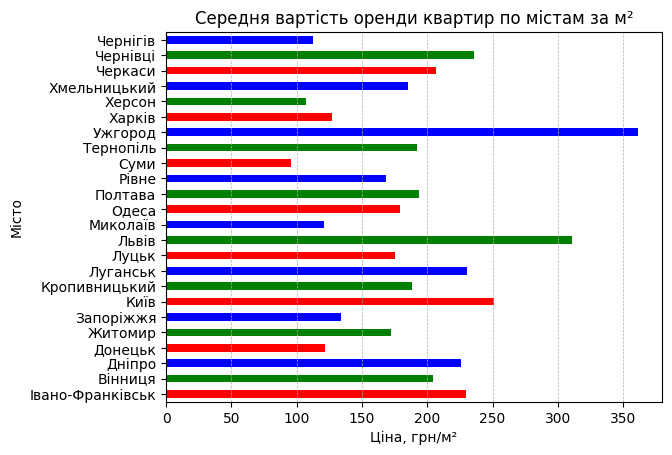

In [61]:
avarage_price_m2 = df.groupby("Місто")["Ціна м2"].mean()
ax = avarage_price_m2.plot(kind="barh", title="Середня вартість оренди квартир по містам за м²", color=["r", "g", "b"], xlabel="Ціна, грн/м²")
ax.xaxis.grid(True, linestyle="--", linewidth=0.5)

<AxesSubplot: title={'center': 'Частка квартир по к-сті кімнат'}>

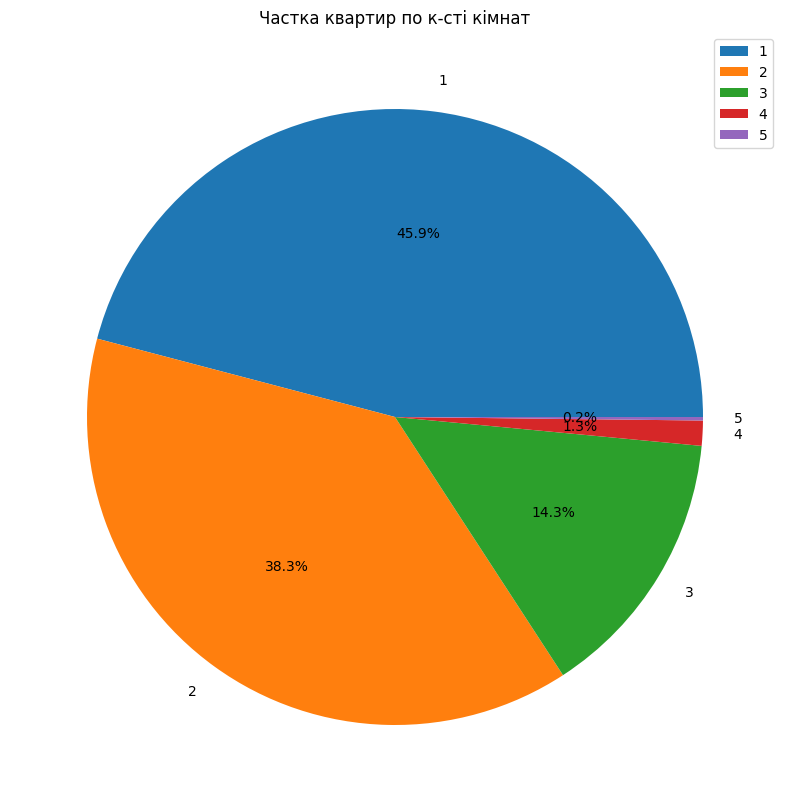

In [62]:
all_rooms = df["Кількість кімнат"].value_counts()
all_rooms.plot(kind="pie", autopct="%1.1f%%", title="Частка квартир по к-сті кімнат", legend=True, ylabel="", figsize=(10,10))

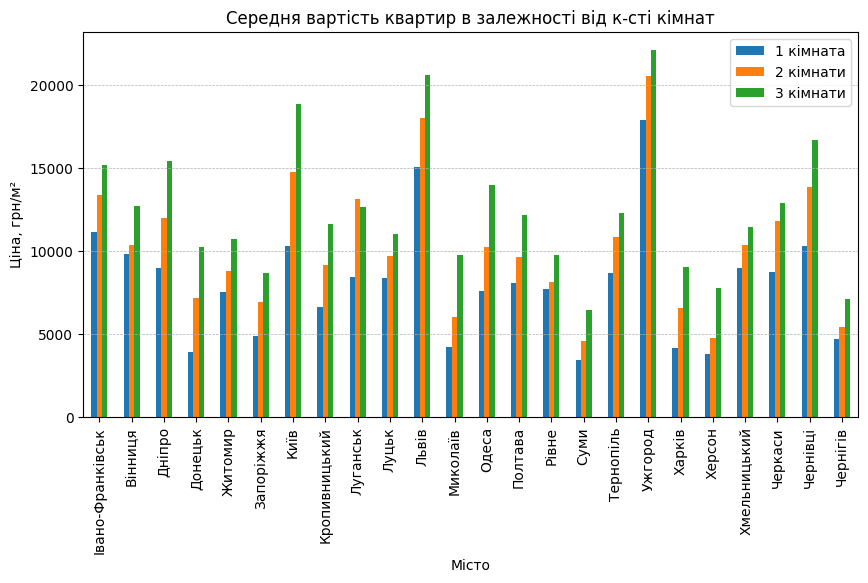

In [63]:
ax = create_df(rooms, group_by["city"], prices["price"]).plot(y=["1 кімната", "2 кімнати", "3 кімнати"], kind="bar", figsize=(10,5), title="Середня вартість квартир в залежності від к-сті кімнат", ylabel="Ціна, грн/м²")
ax.yaxis.grid(True, linestyle="--", linewidth=0.5)

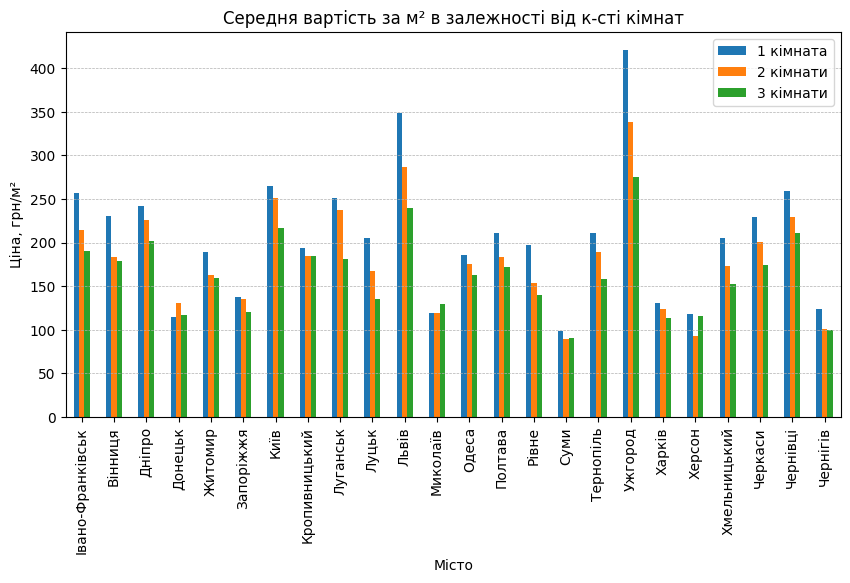

In [64]:
ax = create_df(rooms, group_by["city"], prices["price m2"]).plot(y=["1 кімната", "2 кімнати", "3 кімнати"], kind="bar", figsize=(10,5), title="Середня вартість за м² в залежності від к-сті кімнат", ylabel="Ціна, грн/м²")
ax.yaxis.grid(True, linestyle="--", linewidth=0.5)

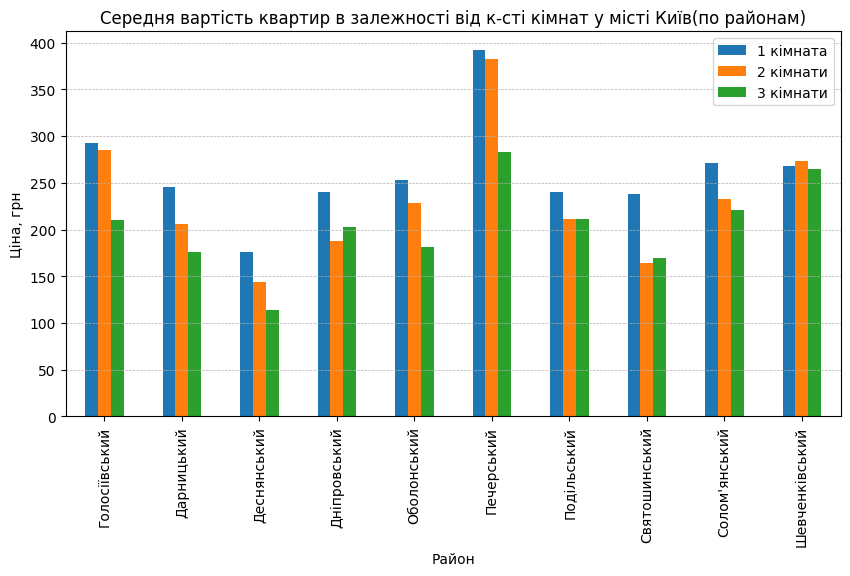

In [65]:
ax = create_df(rooms, group_by["district"], prices["price m2"], city_group_by).plot( y=["1 кімната", "2 кімнати", "3 кімнати"], kind="bar", figsize=(10,5),
                   title="Середня вартість квартир в залежності від к-сті кімнат у місті Київ(по районам)",
                   ylabel="Ціна, грн")
ax.yaxis.grid(True, linestyle="--", linewidth=0.5)

<AxesSubplot: title={'center': 'Відсоток квартир в залежності від типу опалення'}>

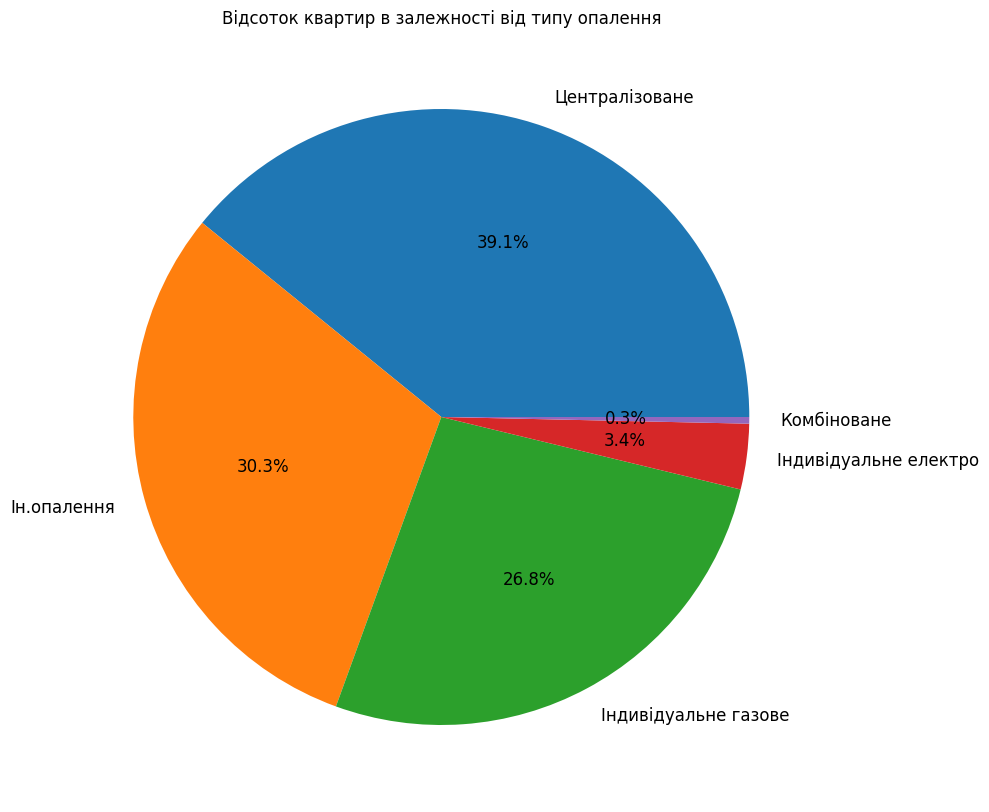

In [66]:
heating = df["Опалення"].value_counts()
heating.plot(kind="pie", autopct="%1.1f%%", title="Відсоток квартир в залежності від типу опалення",
             ylabel="", figsize=(10,10), textprops={"fontsize": 12})

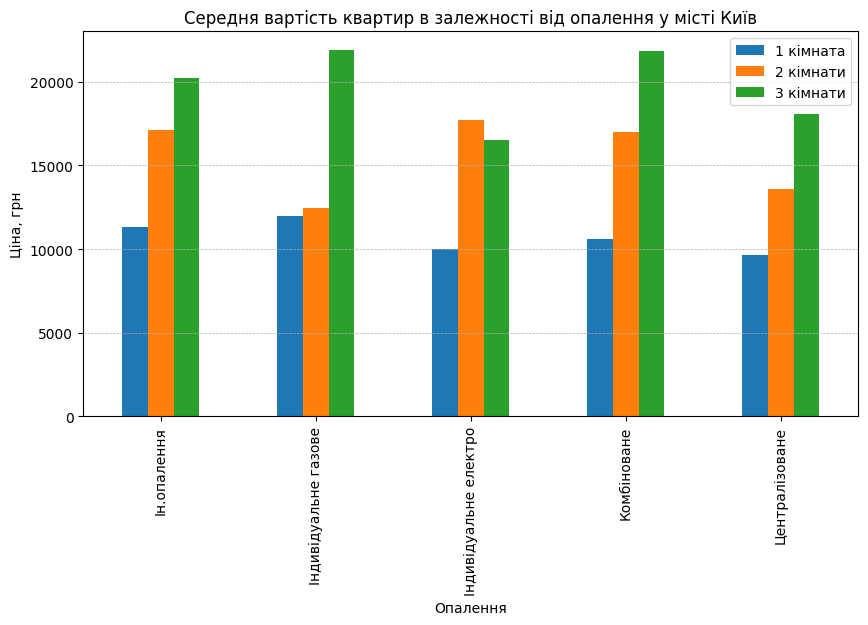

In [67]:
ax = create_df(rooms, group_by["heating"], prices["price"], city_group_by).plot(
    y=["1 кімната", "2 кімнати", "3 кімнати"], kind="bar", figsize=(10,5),
    title="Середня вартість квартир в залежності від опалення у місті Київ",
    ylabel="Ціна, грн"
)
ax.yaxis.grid(True, linestyle="--", linewidth=0.5)

<AxesSubplot: title={'center': 'Відсоток квартир в залежності від стану ремонту'}>

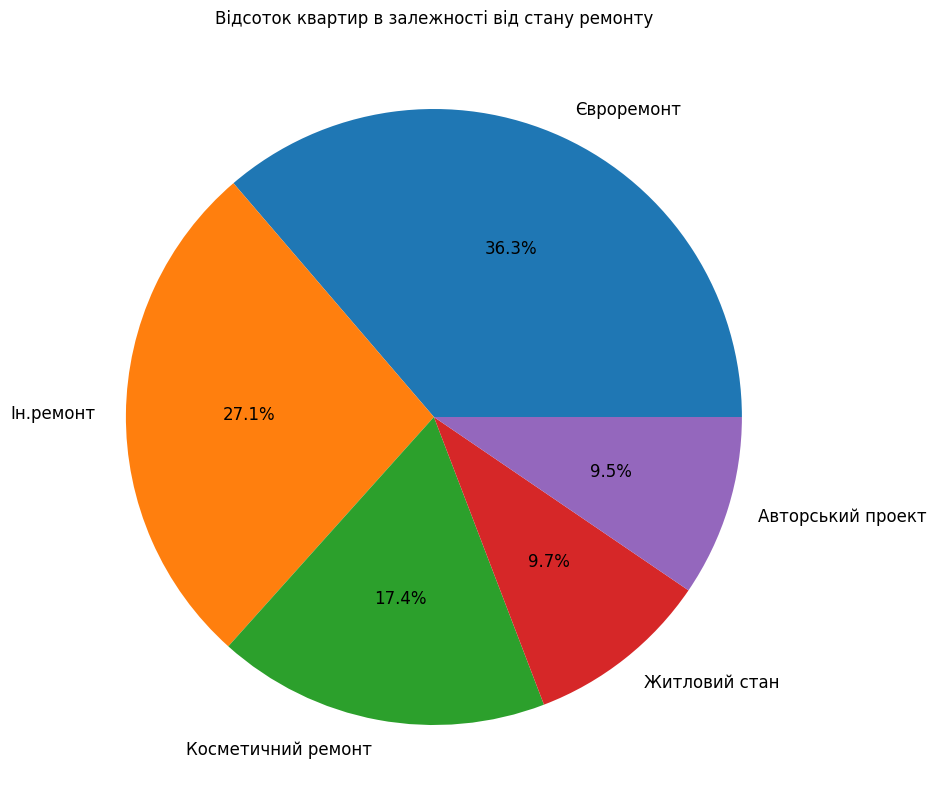

In [68]:
repair_ = df["Ремонт"].value_counts()
repair_.plot(kind="pie", autopct="%1.1f%%", title="Відсоток квартир в залежності від стану ремонту", ylabel="", figsize=(10,10), textprops={"fontsize": 12})

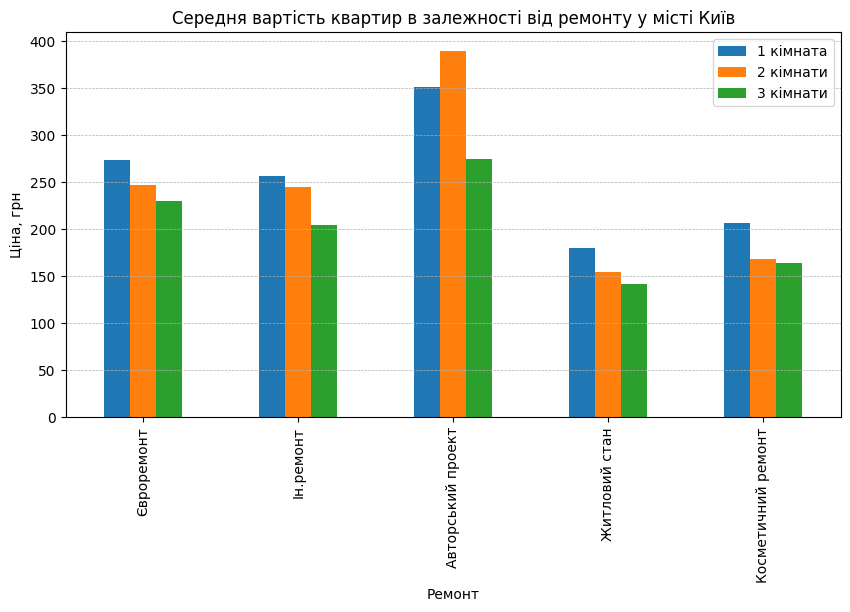

In [69]:
ax = create_df(rooms, group_by["repair"], prices["price m2"], city_group_by).plot(
    y=["1 кімната", "2 кімнати", "3 кімнати"], kind="bar", figsize=(10,5),
    title="Середня вартість квартир в залежності від ремонту у місті Київ",
    ylabel="Ціна, грн"
)
ax.yaxis.grid(True, linestyle="--", linewidth=0.5)

<AxesSubplot: title={'center': 'Відсоток квартир в залежності від стін будинку'}, ylabel='Тип стін'>

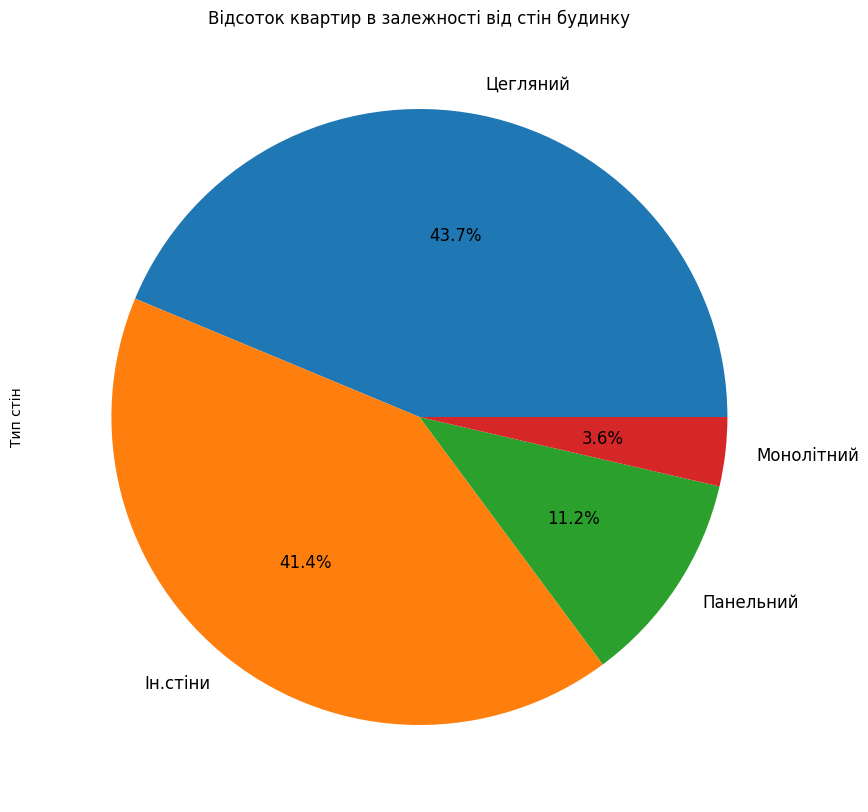

In [70]:
# Відсоток оголошень за ремонтом
repair_ = df["Тип стін"].value_counts()
repair_.plot(kind="pie", autopct="%1.1f%%", title="Відсоток квартир в залежності від стін будинку", figsize=(10,10), textprops={"fontsize": 12})

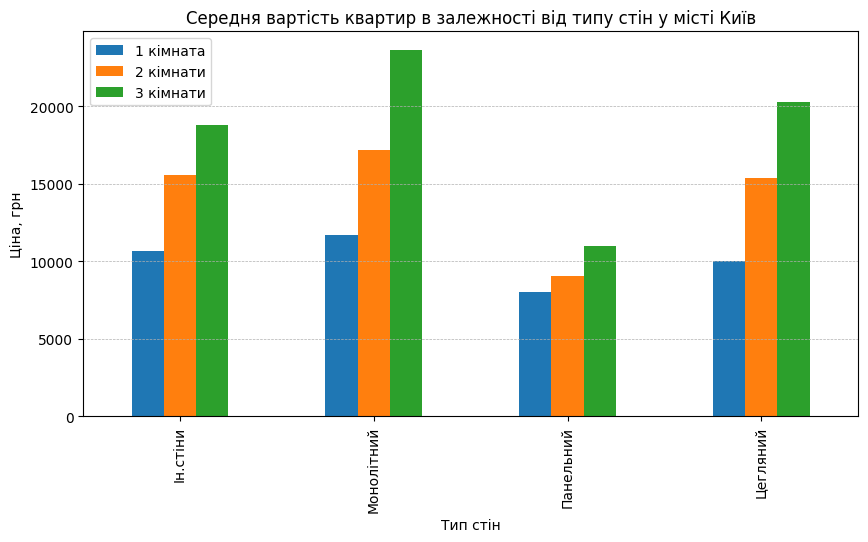

In [71]:
ax = create_df(rooms, group_by["walls"], prices["price"], city_group_by).plot(
    y=["1 кімната", "2 кімнати", "3 кімнати"], kind="bar", figsize=(10,5),
    title="Середня вартість квартир в залежності від типу стін у місті Київ",
    ylabel="Ціна, грн")
ax.yaxis.grid(True, linestyle="--", linewidth=0.5)